# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

### Exploración y limpieza de datos

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/raw/bank-marketing-campaign-data.csv', sep = ';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [3]:
# Obtener las dimensiones.
data.shape

(41188, 21)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Como podemos obserbar, el data set no cuenta con valores nulos.

#### Eliminar duplicados

In [5]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(12)

Nos encontramos con que hay 12 filas duplicadas y pasamos a eliminarlas para convertir el data set en un data set sin duplicados

In [6]:
# Eliminar duplicados. 

data_sin_duplicados = data.drop_duplicates(subset = data.columns)

data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

#### Eliminar columnas sin relevancia

In [8]:
#Eliminar columnas.

data_limpia = data_sin_duplicados.drop(['month', 'day_of_week'], axis = 1, inplace = False)
data_limpia.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261         1    999         0  nonexistent           1.1   
1       149         1    999         0  nonexistent           1.1   
2       226         1    999         0  nonexistent           1.1   
3       151         1    999         0  nonexistent           1.1   
4       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

Tambien eliminamos las columnas que consideramos que no tienen relacion con el problema. 

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

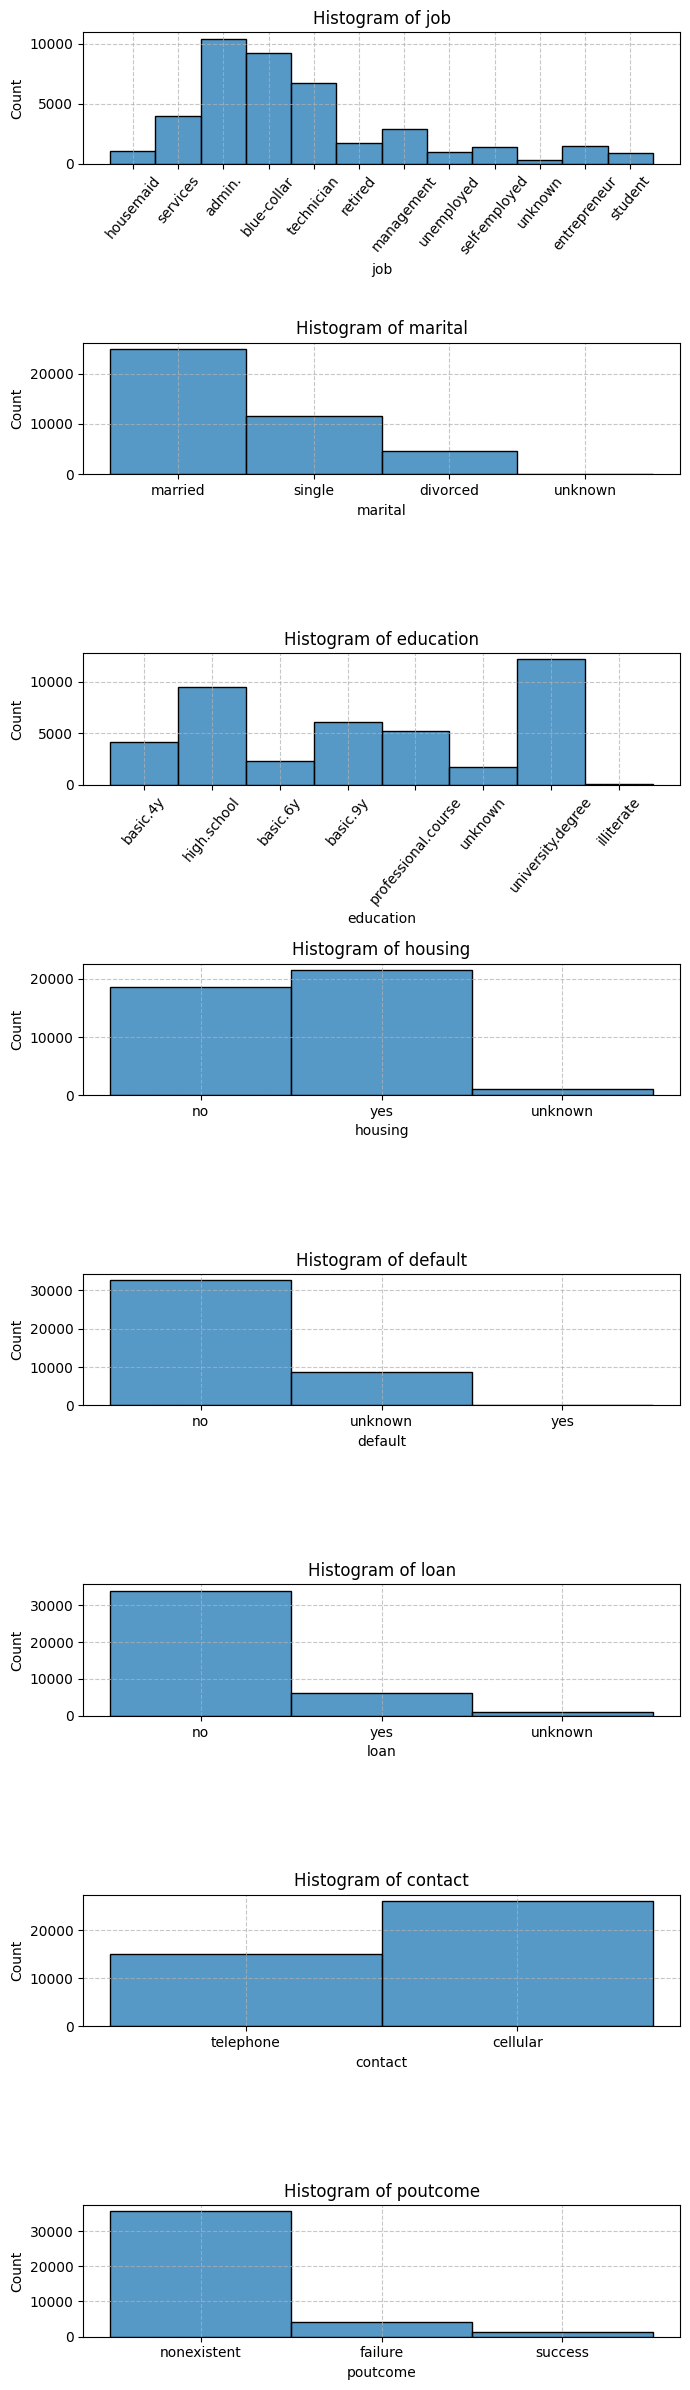

In [12]:
categoricals_variables = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'poutcome']
    

def plot_categoricas(data_set, variables_categoricas):
    
    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricals_variables)

**Análisis de las variables categoricas**

- **Job**: Los empleos que mas se repiten entre las personas del data set son: service, blue-collar, technicians y admin. 
- **marital**: La mayoria de los clientes estan casados, seguido de las personas solteras. 
- **Education**: La educacion esta repartida en varios sectores, pero predominan los estudios universitarios.
- **Default**: Podemos decir que la gran mayoria de clientes no tienen default  y solo una pequeña parte no se conoce, pero no tenemos a nadie que sepamos que si. 
- **Loan**: Mas de 35.000 de los lcientes tiene un prestamo personal.
- **Poutcome**: Casi no tenemos resultados de la campaña de marketing anterior. 


#### Análisis sobre variables numéricas

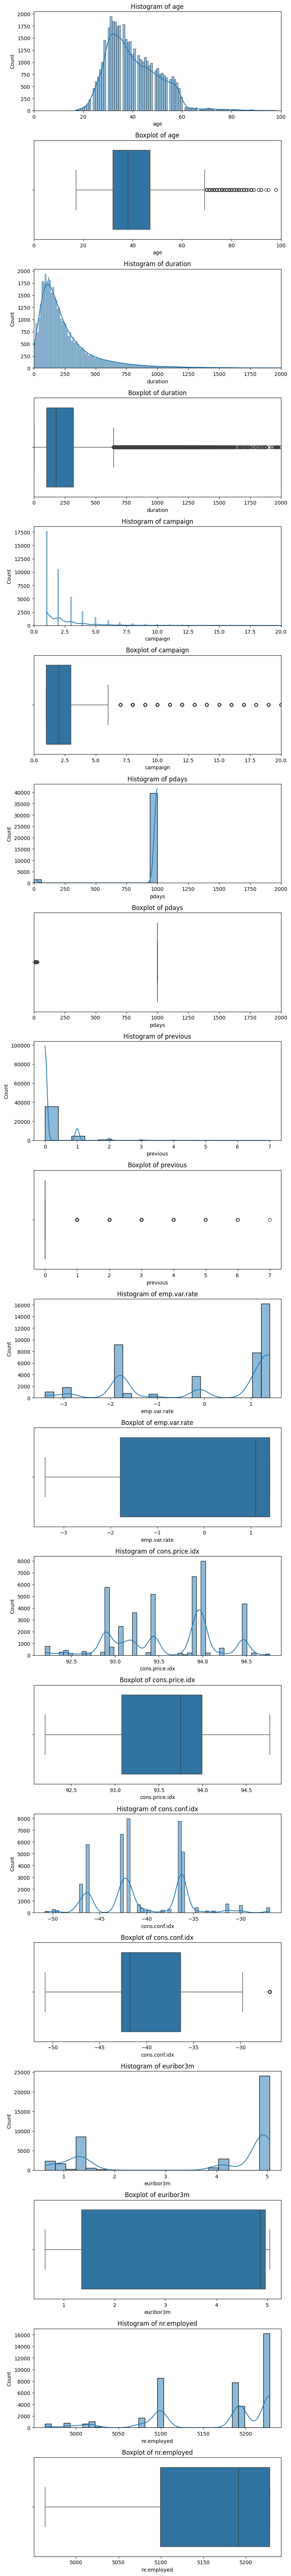

In [ ]:

numericals_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),    
        'campaign': (0, 20), 
        'pdays': (0, 2000),
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

**Análisis de las variables numéricas**

- **Age**: En la variable de la edad, como era de esperar, encontramos una distribucion normal pero cesgada hacia el lado izquierdo donde se encuentran los clientes mas jovenes estando entre los 35 y los 45 años el auge de la contratacion de este servicio. 
- **Duration**: En cuanto a la duracion del contacto previo podemos ver que las llamadas van desde los 0 y 10 min siendo lo más normal llamadas cortas de unos 5 min.
- **Pdays**: Pasaron 1000 dias entre una campaña y otra.  
- **emp.var.rate, cons.price.idx,cons.conf.idx**: Son variables que se mantienen estables y en constante crecimineto. 
- **cons.conf.idx**: Vemos como el indice de confianza del cliente va en aumento. 
- **euribor3m, nr.employed**: Podemos observar como el euribor y el numero de empleados crecen a la par. 

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

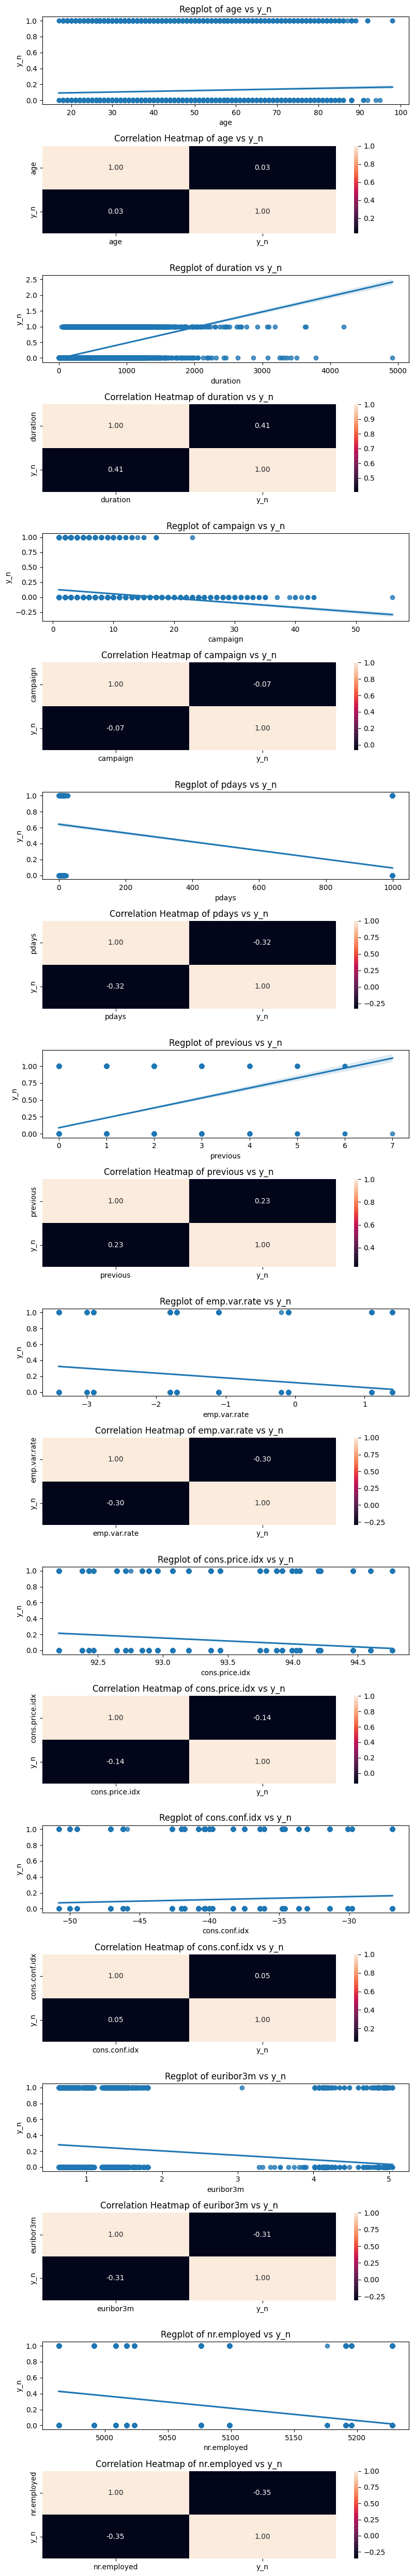

In [ ]:
# En este caso en particular, al ser el traget una variable categorica, la he factorizado para compararla con el resto de variables numericas. 

data_limpia["y_n"] = pd.factorize(data_limpia["y"])[0]

y_n_transformation_rules = {row["y"]: row["y_n"] for _, row in data_limpia[["y", "y_n"]].drop_duplicates().iterrows()}

with open("Y_n transformation_rules.json", "w") as f:
    json.dump(y_n_transformation_rules, f)


    
numericals_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'y_n' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

**Análisis numerico-numerico**

- **campaign vs y**: Podemos observar que los clientes que que han terminado contratando el servicio han tenido un menor numero de contactos durante la campaña. 
- **Euribor**: Tambien podemos observar una relacion negativa(aunque muy leve) entre el euribor y el target, a medida que el euribor aumentaba la contrataciones sel servicio disminuian. 

En el resto de variables no observamos relacion significativa con el target directamente, aunque si podemos observar una posible relacion entre el euribor y el numero de empleados y vamos a corroborarlo haciendo un grafico para ello. Tambien me gustaria comprobar si tienen relacion las variables de  duration y campaign. 

**Análisis de posibles relaciones entre variables numericas**

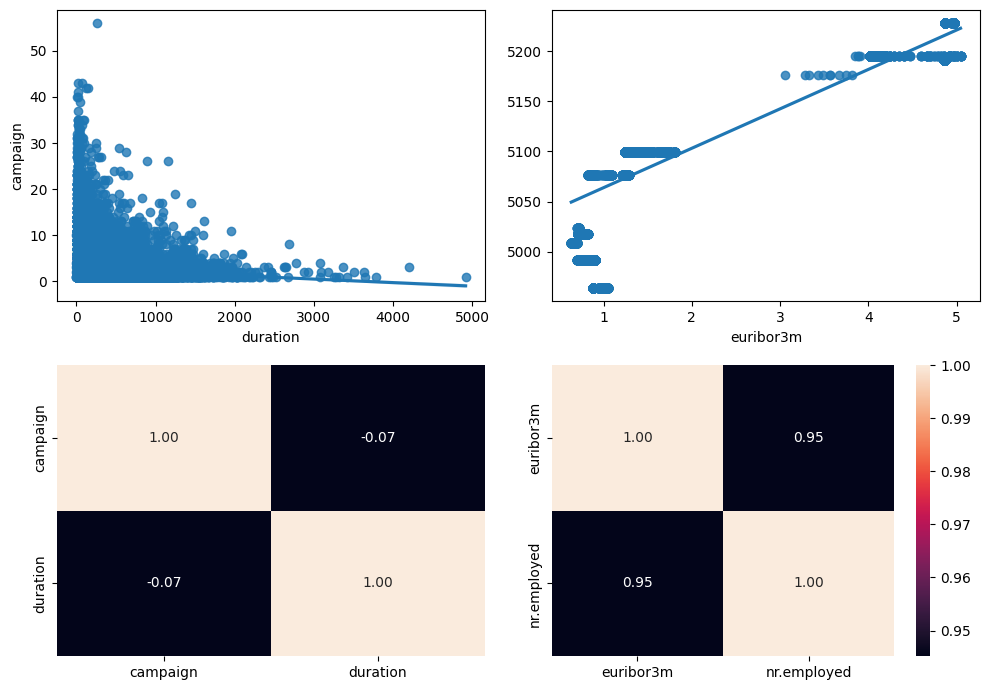

In [13]:


fig, axis = plt.subplots(2, 2, figsize = (10, 7))  

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpia, x = "duration", y = "campaign")
sns.heatmap(data_limpia[["campaign", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "euribor3m", y = "nr.employed").set(ylabel=None)
sns.heatmap(data_limpia[["euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

Como podemos observar hay una fuerte relacion entre la subida y el crecimineto del euribor y el numero de empleados. 

#### Análisis categórico-categórico

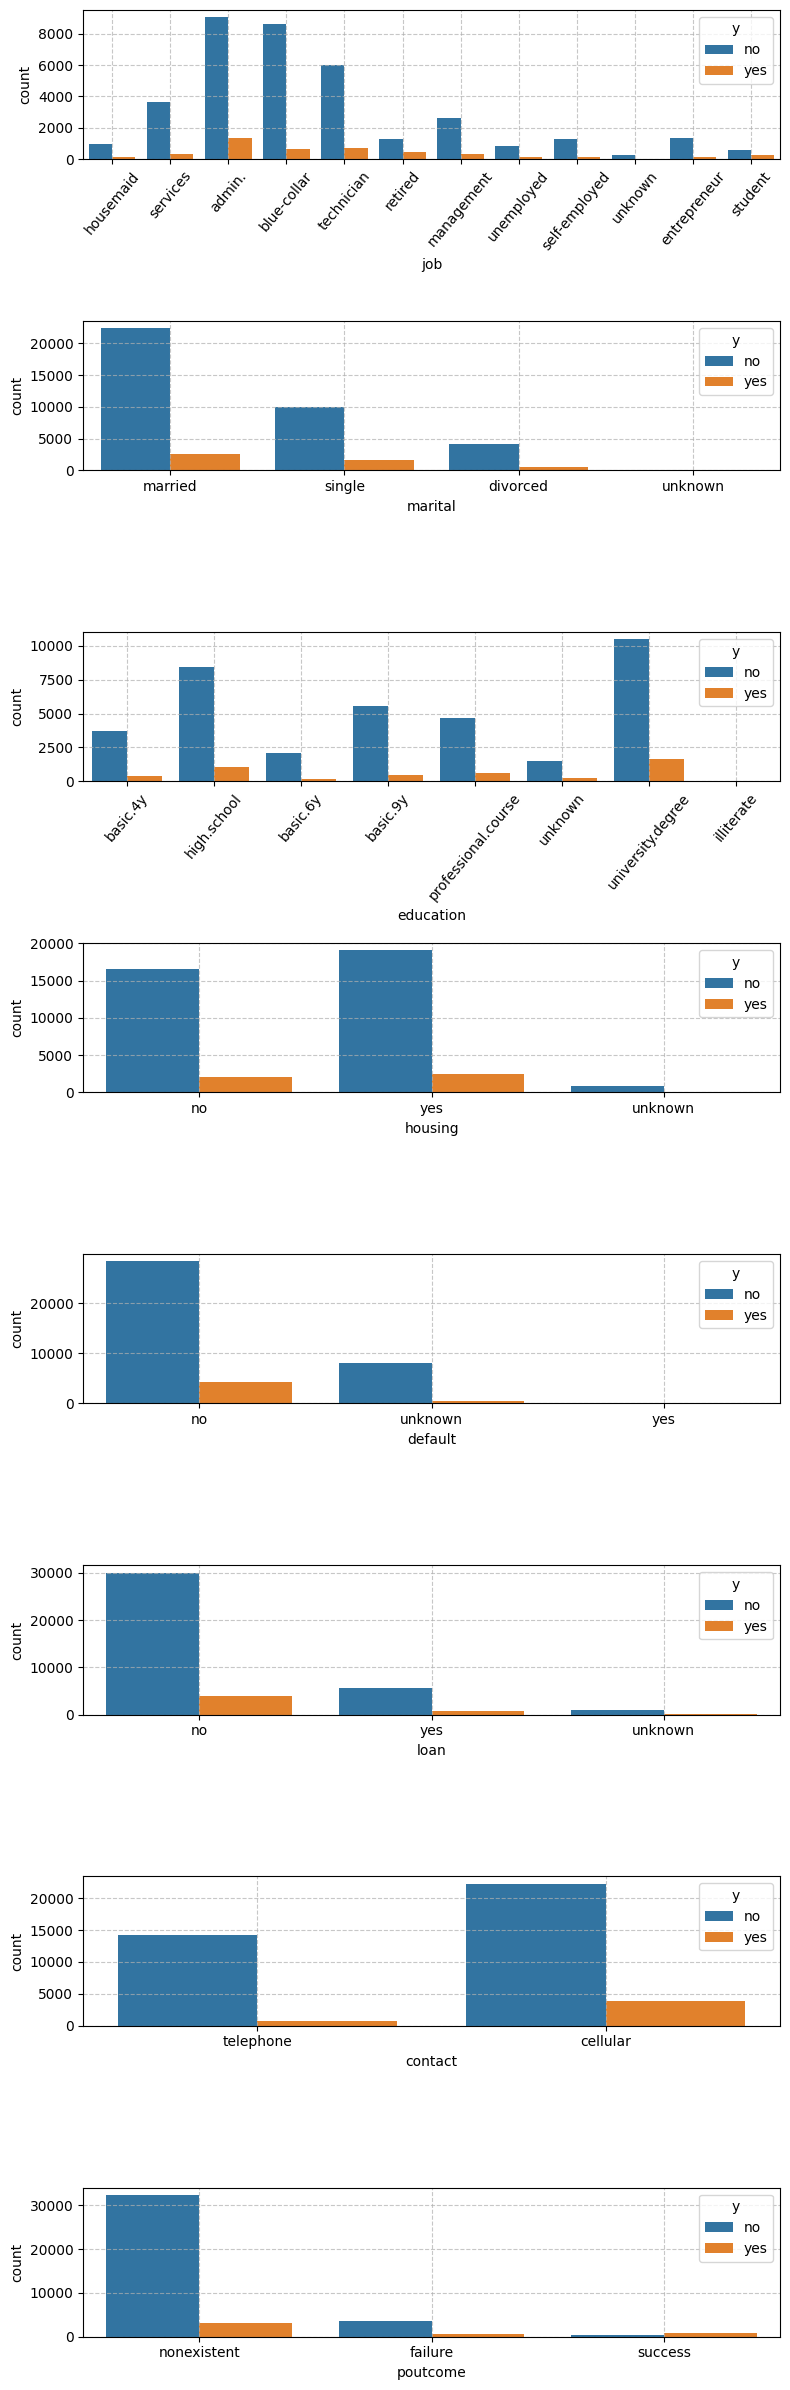

In [16]:
categoricals_variables = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'poutcome']

def plot_categorico_categorico(data_set, variables_categoricas):
    
    target = 'y' # Recordar cambiar el target!!!!!!
    
    # Crear la figura con 1 columna y el número necesario de filas
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(8, len(variables_categoricas) * 3))

    # Iterar sobre las columnas categóricas
    for i, col in enumerate(variables_categoricas):
        # Graficar el countplot
        sns.countplot(ax = axis[i], data = data_set, x = col, hue = target)
        axis[i].grid(linestyle='--', alpha=0.7)

        # Contar las categorías en la columna para el siguiente paso. 
        category_counts = data_set[col].value_counts()
        # Si hay más de 20 categorías, eliminar las etiquetas del eje X
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 8 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categorico_categorico(data_limpia, categoricals_variables)

**Análisis categorico-categorico**

- **Job**: Los clientes con empleos relacionados con la administracion, tecnicos y trabajos fisicos, son los que mas adquieren el producto. 
- **marital**: Son los clientes casados los que mas adquieren el producto, aunque esta distribuido tambien tre los solteros. Los divorciados casi no adquieren el producto. 
- **Education**: Los clientes con estudios universitarios son significativamente las que mas adquieren el producto 
- **Housing**: Vemos como la diferencia de quien adquiere o no el producto es muy leve pero se inclina hacia el lado de los cleintes que si tiene un prestamo de vivienda. 
- **Loan**: Aqui al contrario que housing , vemos como la diferencia de quien adquiere o no el producto se inclina totalmente hacia el lado de los clientes que no tienen un prestamo personal.  
- **Contact**: La gran mayoria de clientes que contrartan el servicio son contactados por telefono celular y no fijo. 


##### Combinaciones de la clase con varias predictoras

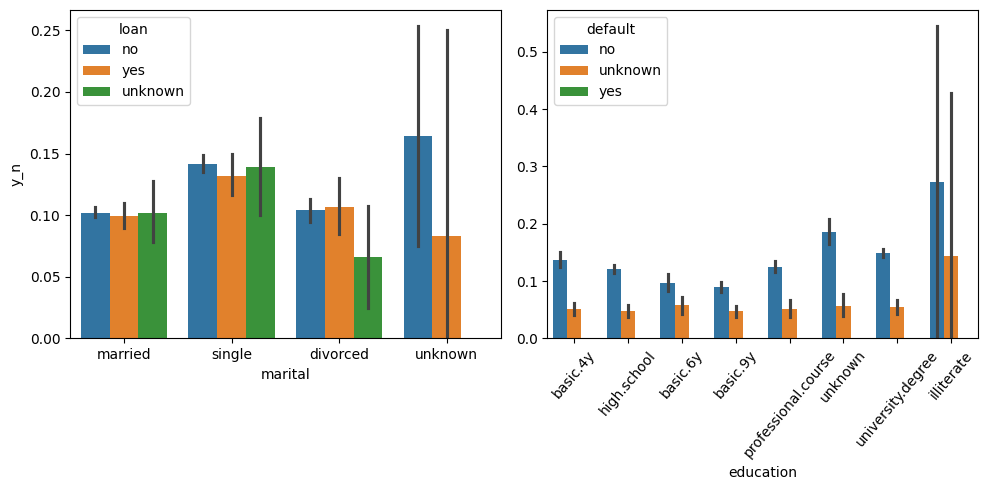

In [15]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data_limpia, x = "marital", y = 'y_n', hue = 'loan')

sns.barplot(ax = axis[1], data = data_limpia, x = "education", y = 'y_n', hue = 'default').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(50)

plt.tight_layout()
plt.show()

En este caso no conseguimos ver relaciones significativas al hacer conbinaciones de clases entre variables. 

##### Análisis de correlaciones. 


In [17]:
# Análisis de correlaciones.

categoricals_variables = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'poutcome']

# Factorización.

data_limpia["job_n"] = pd.factorize(data_limpia["job"])[0]

data_limpia["marital_n"] = pd.factorize(data_limpia["marital"])[0]

data_limpia["education_n"] = pd.factorize(data_limpia["education"])[0]

data_limpia["housing_n"] = pd.factorize(data_limpia["housing"])[0]

data_limpia["default_n"] = pd.factorize(data_limpia["default"])[0]

data_limpia["loan_n"] = pd.factorize(data_limpia["loan"])[0]

data_limpia["contact_n"] = pd.factorize(data_limpia["contact"])[0]

data_limpia["poutcome_n"] = pd.factorize(data_limpia["poutcome"])[0]

# Meter los cambios de factorizacion en un diccionario para que cuando entren datos nuevos pueda saber que numero le hemos asociado a cada valor en la trasnformacion.

job_transformation_rules = {row["job"]: row["job_n"] for _, row in data_limpia[["job", "job_n"]].drop_duplicates().iterrows()}

marital_transformation_rules = {row["marital"]: row["marital_n"] for _, row in data_limpia[["marital", "marital_n"]].drop_duplicates().iterrows()}

education_transformation_rules = {row["education"]: row["education_n"] for _, row in data_limpia[["education", "education_n"]].drop_duplicates().iterrows()}

housing_transformation_rules = {row["housing"]: row["housing_n"] for _, row in data_limpia[["housing", "housing_n"]].drop_duplicates().iterrows()}

default_transformation_rules = {row["default"]: row["default_n"] for _, row in data_limpia[["default", "default_n"]].drop_duplicates().iterrows()}

loan_transformation_rules = {row["loan"]: row["loan_n"] for _, row in data_limpia[["loan", "loan_n"]].drop_duplicates().iterrows()}

contact_group_transformation_rules = {row["contact"]: row["contact_n"] for _, row in data_limpia[["contact", "contact_n"]].drop_duplicates().iterrows()}

poutcome_transformation_rules = {row["poutcome"]: row["poutcome_n"] for _, row in data_limpia[["poutcome", "poutcome_n"]].drop_duplicates().iterrows()}


# Crea un diccionario que contenga todos los otros diccionarios.

all_transformation_rules = {
    "job": job_transformation_rules,
    "marital": marital_transformation_rules,
    "education": education_transformation_rules,
    "housing": housing_transformation_rules,
    "default": default_transformation_rules,
    "loan": loan_transformation_rules,
    "contact": contact_group_transformation_rules,
    "poutcome": poutcome_transformation_rules
}

# Meter el diccionario en un json para guardarlo y poder disponer de el cuando quiera. 

with open("Transformation_rules.json", "w") as f:
    json.dump(all_transformation_rules, f)

data_limpia.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261         1    999         0  nonexistent           1.1   
1       149         1    999         0  nonexistent           1.1   
2       226         1    999         0  nonexistent           1.1   
3       151         1    999         0  nonexistent           1.1   
4       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  job_n  \
0          93.994          -36.4      4.857       5191.0  no      0   
1          93.994          -36.4      4.857       5191.0  no      1   
2          93.994          -36.4      4.857       5191.0  no      1   
3          93.994          -36.4      4.857       5191.0  no      2   
4          93.994          -36.4      4.857       5191.0  no      1   

   marital_n  education_n  housing_n  default_n  loan_n  contact_n  poutcome_n  
0          0            0          0          0       0          0           0  
1          0            1          0          1       0          0           0  
2          0            1          1          0       0          0           0  
3          0            2          0          0       0          0           0  
4          0            1          0          0       1          0           0

##### Análisis de correlaciones numerico

KeyError: "['y_n'] not in index"

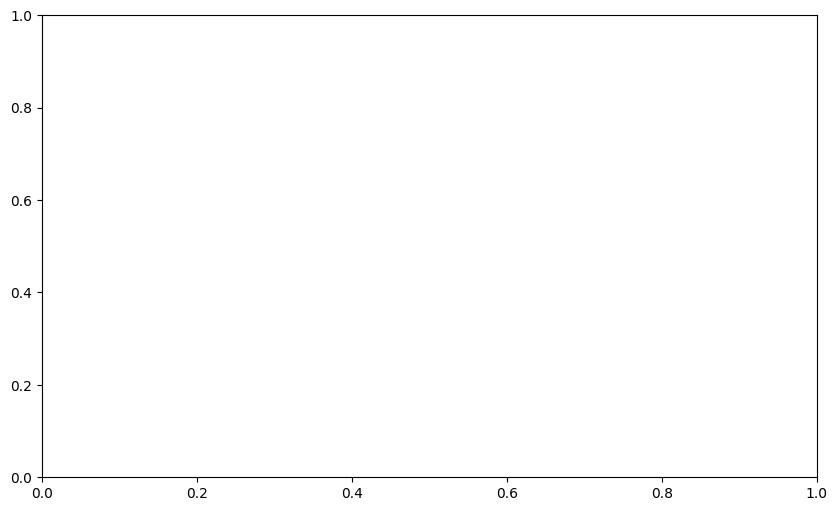

In [ ]:

categoricals_variables_factorizadas = ['y_n', 'job_n', 'marital_n', 'education_n', 'housing_n', 'default_n', 'loan_n', 'contact_n', 'poutcome_n']

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data_limpia[categoricals_variables_factorizadas].corr(), annot = True, fmt = ".2f", cmap = "coolwarm")

plt.tight_layout()

plt.show()

El análisis de correlaciones refleja una relación directa entre el resultado de la campaña anterior (`poutcome_n`) y la adquisicion del producto, como hemos visto en apartados anteriores. Tambien podemos observar una relacion negativa y reseñable pero muy debil entre (`default`) y el resultado de la campaña en clientes.  El resto de relaciones son debiles y no nos ofrecen casi informacion sobre el resultado de la campaña. 

#### Análisis de correlaciones numérico-categórico (completo)

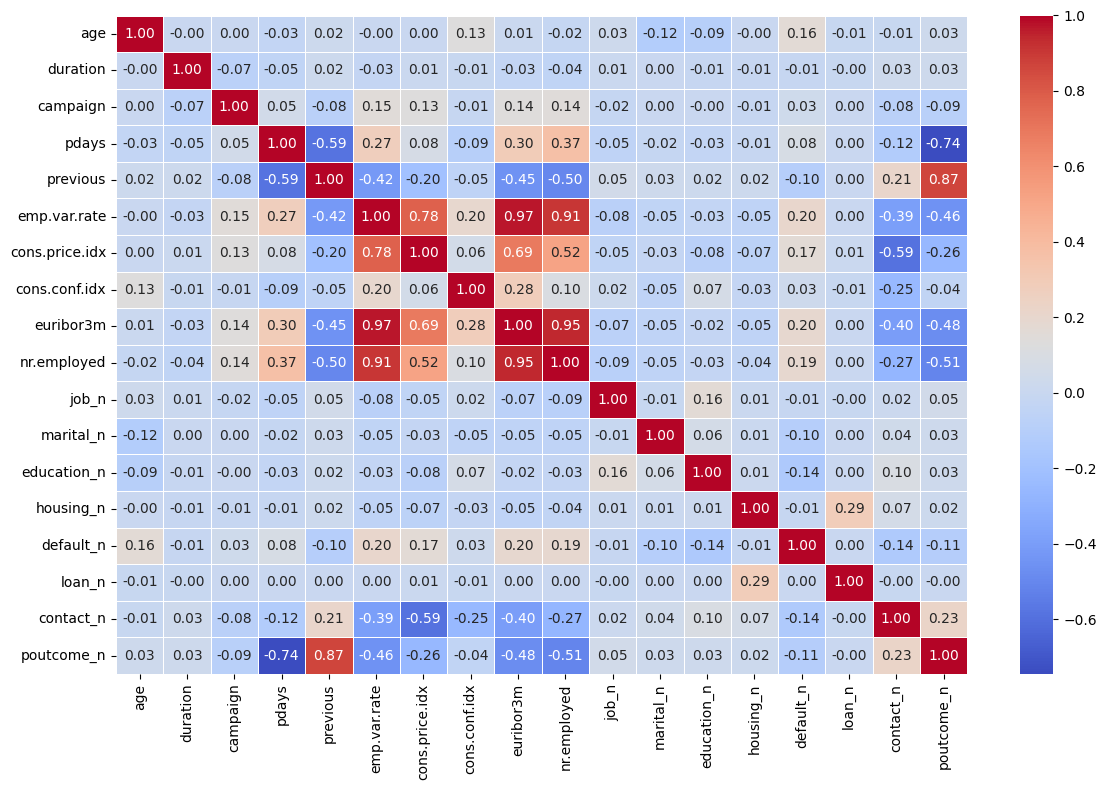

In [18]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)

Como pudimos obserbar mas arriba, el análisis de correlaciones refleja una relación directa entre el resultado de la campaña anterior (`poutcome_n`) y la adquisicion del producto. Tambien podemos observar una relacion reseñable entre (`duration`) y el resultado de la campaña en clientes (los cielntes que contrataron el producto mantuvieron llamadas cortas).  El resto de relaciones no nos ofrecen casi informacion sobre el resultado de la campaña. 

Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

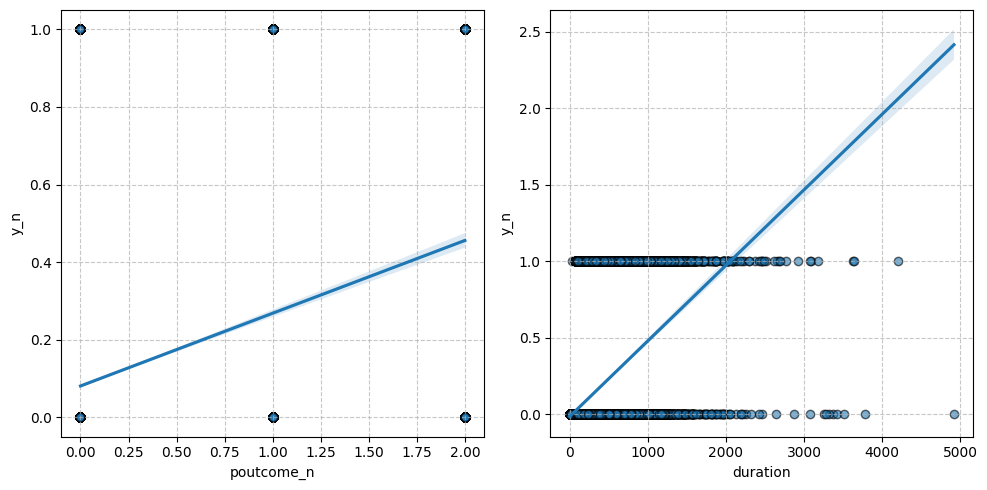

In [20]:
# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "poutcome_n", y = "y_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "duration", y = "y_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

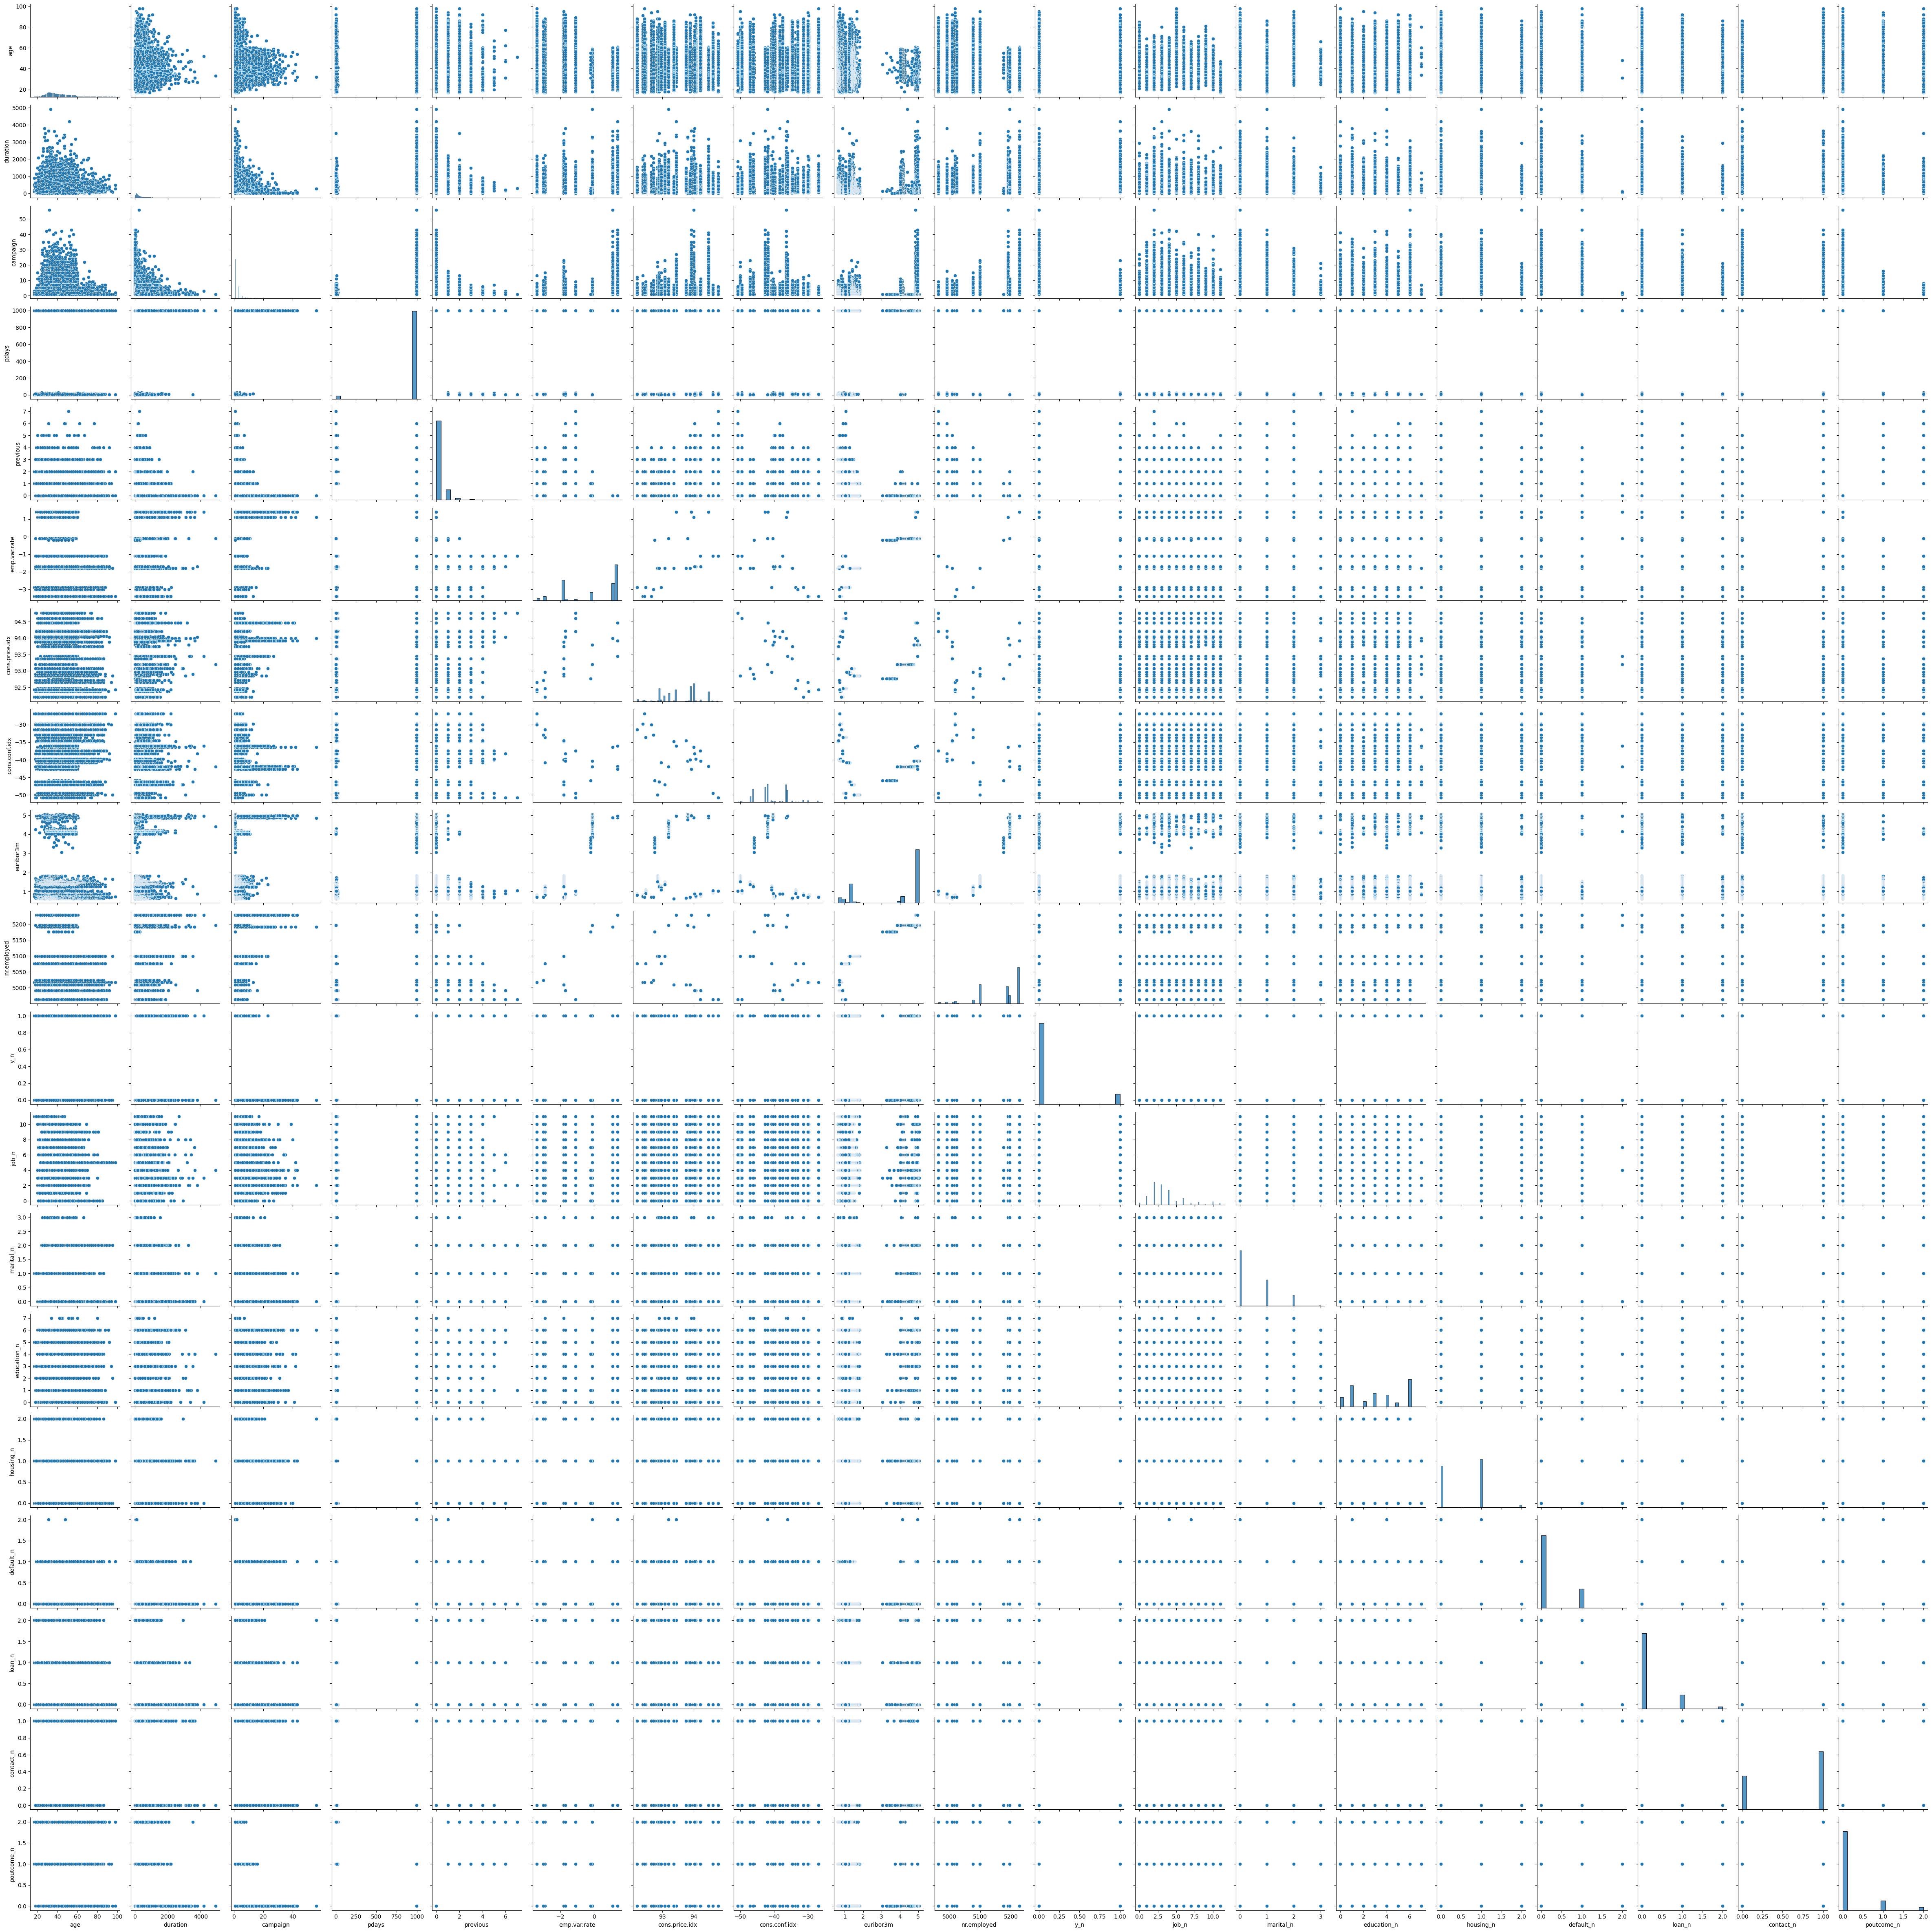

In [19]:
# graficar el pairplot.

sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [21]:
data_limpia.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed           y_n         job_n     marital_n   education_n  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean    5167.034870      0.112663      3.673863      0.510637      3.277370   
std       72.251364      0.316184      2.454340      0.696794      2.185558   
min     4963.600000      0.000000      0.000000      0.000000      0.000000   
25%     5099.100000      0.000000      2.000000      0.000000      1.000000   
50%     5191.000000      0.000000      3.000000      0.000000      3.000000   
75%     5228.100000      0.000000      4.000000      1.000000      6.000000   
max     5228.100000      1.000000     11.000000      3.000000      7.000000   

          housing_n     default_n        loan_n     contact_n    poutcome_n  
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000  
mean       0.571959      0.208908      0.199825      0.634714      0.169953  
std        0.541216      0.406713      0.456055      0.481516      0.455811  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.000000      1.000000      0.000000  
75%        1.000000      0.000000      0.000000      1.000000      0.000000  
max        2.000000      2.000000      2.000000      1.000000      2.000000

#### Boxplots para visualizar los outliers

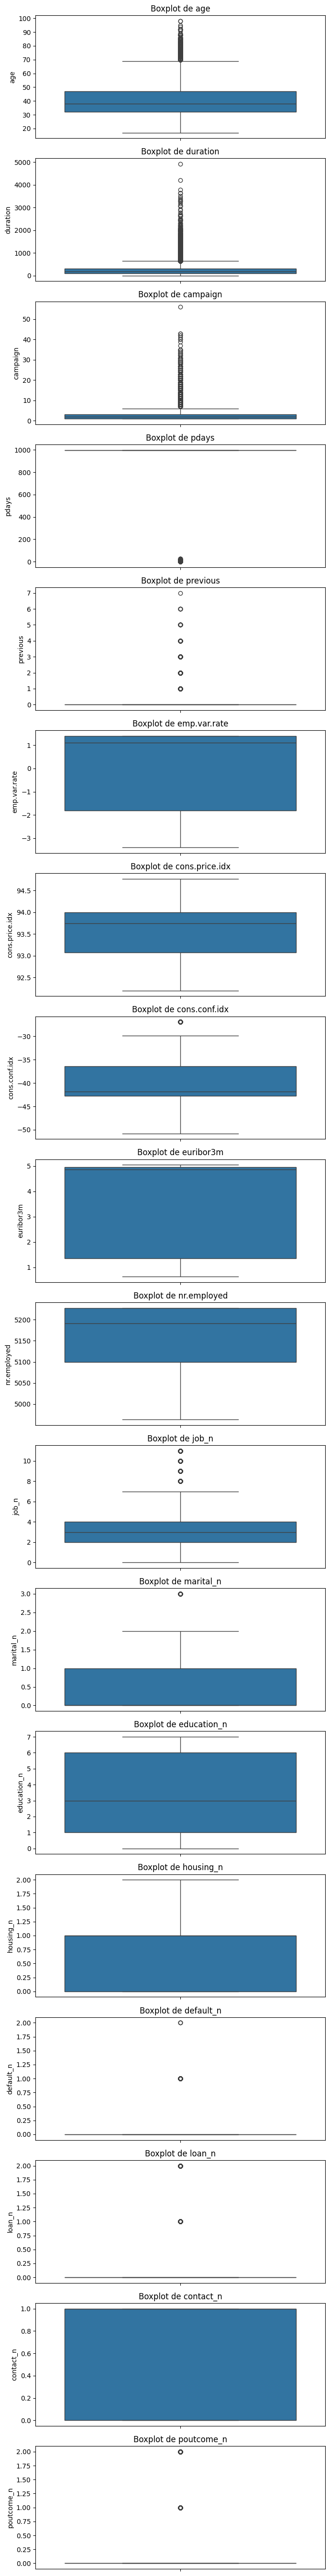

In [20]:
def plot_boxplots_numericos(data_set):
    # Esta variable filtrará el data frame y me devolverá los nombres de las columnas numericas. 
    column_filter_numericas = data_set.select_dtypes(include = 'number').drop(columns = [''], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.
    
    # Crear el gráfico con subgráficas en una sola columna
    fig, axis = plt.subplots(len(column_filter_numericas), 1, figsize=(7, len(column_filter_numericas) * 3))
     
    # Si solo hay una columna, `axis` no es un array, lo convertimos en uno
    if len(column_filter_numericas) == 1:
        axis = [axis]
    
    # Generar los boxplots para cada columna numérica.
    for i, columna in enumerate(column_filter_numericas):
        sns.boxplot(ax = axis[i], data = data_set, y = columna)
        axis[i].set_title(f'Boxplot de {columna}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data_limpia)


Podemos determinar fácilmente que las variables afectadas por outliers son `age`, `campaign`, `pdays`,`previous`, `cons.conf.idx`, `job_n`, `marital_n`, `default_n`, `poutcome_n` y `loan_n`.

#### Separación del Dataset en uno con outliers y otro sin outliers

In [25]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ["age", "campaign", "pdays", "previous", "cons.conf.idx", "job_n", "marital_n", "default_n", "poutcome_n", "loan_n"]: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'campaign': [0, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'cons.conf.idx': [0, np.float64(-26.949999999999992)],
 'job_n': [0, np.float64(7.0)],
 'marital_n': [0, np.float64(2.5)],
 'default_n': [np.float64(0.0), np.float64(0.0)],
 'poutcome_n': [np.float64(0.0), np.float64(0.0)],
 'loan_n': [np.float64(0.0), np.float64(0.0)]}

#### Análisis de valores faltantes

In [26]:
data_limpia_con_outliers.isnull().sum().sort_values(ascending=False)


age               0
job               0
contact_n         0
loan_n            0
default_n         0
housing_n         0
education_n       0
marital_n         0
job_n             0
y_n               0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
poutcome_n        0
dtype: int64

In [27]:
data_limpia_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
contact_n         0
loan_n            0
default_n         0
housing_n         0
education_n       0
marital_n         0
job_n             0
y_n               0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
poutcome_n        0
dtype: int64

### IMPORTANTE

En este caso no encontramos valores faltantes en ninguno de los dos data set (data_limpia_con_outliers, data_limpia_sin_outliers), si no fuese este el caso, y tuviesemos que lidiar con ellos lo hariamos de la siguiente manera.  

total_data["Age"].fillna(total_data["Age"].median(), inplace = True)

total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True) # RECORDANDO QUE MODE PARA LAS VARIABLES CATEGORICAS

total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True) # Y MEDIA PARA LAS VARIABLES NUMERICAS

total_data.isnull().sum()

#### Inferencia de nuevas características

In [ ]:
# Esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes.

# IMPORTANTE TENER EN CUENTA EL RESULTADO DE LA COLUMNA A ESPERAR PARA SABER SI COMO TRATAR LA FUSION(si por ejemplo con una simple suma, un |(or) o como en este caso convertir las columnas a int)

# Convertir las columnas a 0 o 1, tratando los valores mayores que 0.0 como 1 (préstamo presente)
data_limpia_con_outliers["client_with_loan"] = ((data_limpia_con_outliers["housing_n"] > 0).astype(int) | (data_limpia_con_outliers["loan_n"] > 0.0).astype(int))

data_limpia_sin_outliers["client_with_loan"] = ((data_limpia_sin_outliers["housing_n"] > 0).astype(int) | (data_limpia_sin_outliers["loan_n"] > 0.0).astype(int))


data_limpia_sin_outliers.head()

age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married     basic.4y       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married     basic.6y       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261       1.0  999.0       0.0  nonexistent           1.1   
1       149       1.0  999.0       0.0  nonexistent           1.1   
2       226       1.0  999.0       0.0  nonexistent           1.1   
3       151       1.0  999.0       0.0  nonexistent           1.1   
4       307       1.0  999.0       0.0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  y_n  job_n  \
0          93.994              0      4.857       5191.0  no    0    0.0   
1          93.994              0      4.857       5191.0  no    0    1.0   
2          93.994              0      4.857       5191.0  no    0    1.0   
3          93.994              0      4.857       5191.0  no    0    2.0   
4          93.994              0      4.857       5191.0  no    0    1.0   

   marital_n  education_n  housing_n  default_n  loan_n  contact_n  \
0        0.0            0          0        0.0     0.0          0   
1        0.0            1          0        0.0     0.0          0   
2        0.0            1          1        0.0     0.0          0   
3        0.0            2          0        0.0     0.0          0   
4        0.0            1          0        0.0     0.0          0   

   poutcome_n  client_with_loan  
0         0.0                 0  
1         0.0                 0  
2         0.0                 1  
3         0.0                 0  
4         0.0                 0

#### Escalado de valores

In [37]:
# Escalado de valores:

# Separar 'x_con_outliers' y 'x_sin_outliers' e 'Y' en train y test. (resultante 6 excels). 

num_variables = ["age", 'duration', "campaign", "pdays", "previous", 'emp.var.rate', 'cons.price.idx', "cons.conf.idx", 'euribor3m', 'nr.employed', "job_n", "marital_n", 'education_n', 'housing_n', "default_n", "loan_n", 'contact_n', "poutcome_n", 'client_with_loan'] # Aqui van las variables numericas. 

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data_limpia_con_outliers.drop("y_n", axis = 1)[num_variables]
X_sin_outliers = data_limpia_sin_outliers.drop("y_n", axis = 1)[num_variables]
y = data_limpia_con_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/y_train.xlsx", index = False)
y_test.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/y_test.xlsx", index = False)

X_train_con_outliers.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
12348   29       286         3    999         0           1.4          93.918   
8565    50       178         6    999         0           1.4          94.465   
21424   29       103         4    999         0           1.4          93.444   
3316    35       135         1    999         0           1.1          93.994   
33246   40       418         1    999         0          -1.8          92.893   

       cons.conf.idx  euribor3m  nr.employed  job_n  marital_n  education_n  \
12348          -42.7      4.959       5228.1     10          0            2   
8565           -41.8      4.864       5228.1      2          1            6   
21424          -36.1      4.963       5228.1      2          1            6   
3316           -36.4      4.860       5191.0      2          1            6   
33246          -46.2      1.291       5099.1      3          1            1   

       housing_n  default_n  loan_n  contact_n  poutcome_n  client_with_loan  
12348          1          0       1          0           0                 1  
8565           0          0       0          0           0                 0  
21424          0          0       0          1           0                 0  
3316           0          0       0          0           0                 0  
33246          0          1       0          1           0                 0

##### Normalización

In [38]:
# Normalización:

from sklearn.preprocessing import StandardScaler
import pickle

num_variables = ["age", 'duration', "campaign", "pdays", "previous", 'emp.var.rate', 'cons.price.idx', "cons.conf.idx", 'euribor3m', 'nr.employed', "job_n", "marital_n", 'education_n', 'housing_n', "default_n", "loan_n", 'contact_n', "poutcome_n", 'client_with_loan'] # Aqui van las variables numericas. 
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)   

with open("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/models(norm/scal)/normalizador_con_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/models(norm/scal)/normalizador_sin_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

age  duration  campaign     pdays  previous  emp.var.rate  \
12348 -1.058427  0.112453  0.152155  0.195697 -0.348601      0.838815   
8565   0.954767 -0.305973  1.229538  0.195697 -0.348601      0.838815   
21424 -1.058427 -0.596546  0.511282  0.195697 -0.348601      0.838815   
3316  -0.483229 -0.472568 -0.566100  0.195697 -0.348601      0.647683   
33246 -0.003897  0.623862 -0.566100  0.195697 -0.348601     -1.199927   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed     job_n  \
12348        0.589534      -0.470932   0.771196     0.843413  2.600348   
8565         1.534740      -0.276368   0.716413     0.843413 -0.679177   
21424       -0.229530       0.955866   0.773502     0.843413 -0.679177   
3316         0.720860       0.891011   0.714107     0.330793 -0.679177   
33246       -1.181648      -1.227566  -1.343979    -0.939011 -0.269237   

       marital_n  education_n  housing_n  default_n    loan_n  contact_n  \
12348  -0.734095    -0.582336   0.788248  -0.511455  1.750366  -1.316322   
8565    0.698859     1.248416  -1.060840  -0.511455 -0.440002  -1.316322   
21424   0.698859     1.248416  -1.060840  -0.511455 -0.440002   0.759693   
3316    0.698859     1.248416  -1.060840  -0.511455 -0.440002  -1.316322   
33246   0.698859    -1.040024  -1.060840   1.953044 -0.440002   0.759693   

       poutcome_n  client_with_loan  
12348   -0.371649          0.795433  
8565    -0.371649         -1.257177  
21424   -0.371649         -1.257177  
3316    -0.371649         -1.257177  
33246   -0.371649         -1.257177

##### Escalado Mínimo-Máximo

In [39]:
# Escalado Mínimo-Máximo:

from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", 'duration', "campaign", "pdays", "previous", 'emp.var.rate', 'cons.price.idx', "cons.conf.idx", 'euribor3m', 'nr.employed', "job_n", "marital_n", 'education_n', 'housing_n', "default_n", "loan_n", 'contact_n', "poutcome_n", 'client_with_loan'] # Aqui van las variables numericas.

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/models(norm/scal)/scaler_con_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_con_outliers, file)
  
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/models(norm/scal)/scaler_sin_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/data_(excels)/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

age  duration  campaign  pdays  previous  emp.var.rate  \
12348  0.148148  0.058154  0.036364    1.0       0.0      1.000000   
8565   0.407407  0.036194  0.090909    1.0       0.0      1.000000   
21424  0.148148  0.020943  0.054545    1.0       0.0      1.000000   
3316   0.222222  0.027450  0.000000    1.0       0.0      0.937500   
33246  0.283951  0.084994  0.000000    1.0       0.0      0.333333   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed     job_n  \
12348        0.669135       0.338912   0.980503     1.000000  0.909091   
8565         0.882307       0.376569   0.958966     1.000000  0.181818   
21424        0.484412       0.615063   0.981410     1.000000  0.181818   
3316         0.698753       0.602510   0.958059     0.859735  0.181818   
33246        0.269680       0.192469   0.148946     0.512287  0.272727   

       marital_n  education_n  housing_n  default_n  loan_n  contact_n  \
12348   0.000000     0.285714        0.5        0.0     0.5        0.0   
8565    0.333333     0.857143        0.0        0.0     0.0        0.0   
21424   0.333333     0.857143        0.0        0.0     0.0        1.0   
3316    0.333333     0.857143        0.0        0.0     0.0        0.0   
33246   0.333333     0.142857        0.0        0.5     0.0        1.0   

       poutcome_n  client_with_loan  
12348         0.0               1.0  
8565          0.0               0.0  
21424         0.0               0.0  
3316          0.0               0.0  
33246         0.0               0.0

### Paso 6: Selección de características (Feature selection)

In [ ]:
X_train_con_outliers
X_train_sin_outliers
X_test_con_outliers
X_test_sin_outliers
y_train
y_test
X_train_con_outliers_norm
X_test_con_outliers_norm
X_train_sin_outliers_norm
X_test_sin_outliers_norm
X_train_con_outliers_scal
X_test_con_outliers_scal
X_train_sin_outliers_scal
X_test_sin_outliers_scal

In [ ]:
# from sklearn.feature_selection import f_classif, SelectKBest

# # Con un valor de k = 4 decimos implícitamente que queremos eliminar 1 característica1 del conjunto de datos.

# selection_model = SelectKBest(f_classif, k = 4)
# selection_model.fit(X_train_sin_outliers_scal, y_train)

# ix = selection_model.get_support()
# X_train_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers_scal), columns = X_train_sin_outliers_scal.columns.values[ix])
# X_test_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers_scal), columns = X_test_sin_outliers_scal.columns.values[ix])

# # GUARDO X_train_sel.columns

# columns_list = X_train_sel.columns # Convierte el objeto Index a una lista.tolist()

# with open("feature_selection_k_4.json", "w") as f:
#   json.dump(columns_list, f)

# X_train_sel.head()